# WEB SCRAPING PROJECT

### PART 1:

### COUNTRIES IN THE WORLD BY POPULATION (2020)

The current data is of the populations of countries in 2020 based on the latest United Nations Population Division estimates.

The population of some dependent territories is also mentioned along with the soveriegn and independent countries.

In this data there are various factors that depict the population and the demographics of a country or dependent territories, they are:

1. Population - Total no.of people in a Country.

2. Change in population - Change in population compared to previous year.

3. Change in population in percentage

4. Population Density - No.of people/Sq.KM

5. Land Area - Amount of area that a country has within its boundaries.

6. Migrants (Immigrants/Emmigrants) - No. of people moving in and out of the country.

7. Fertility Rate -  The number of children born alive to women of that age during the year as a proportion of the average annual population of women of the same age.

8. Median Age - Age that divides the population in two parts of equal size.

9. Urban Population Percentage - Percentage of people that live in Urban areas of a country.

10. World share of population in % - Percentage of a country's population in the world.

##### STEP 1:Scraping the given Data using BeautifulSoup.

In [190]:
pip install requests 

Note: you may need to restart the kernel to use updated packages.


The 'pip install requests' installs the requests library which is used to read the web pages in python.

In [5]:
import requests   
Link = "https://www.worldometers.info/world-population/population-by-country/"
page_code = requests.get(Link)
print(page_code)

<Response [200]>


The get() method sends a GET request to the specified Link or URL.
The output '<Response [200]>' indiactes that the request to access the web page has succeeded.

In [191]:
from bs4 import BeautifulSoup
URL = "https://www.worldometers.info/world-population/population-by-country/"
data = requests.get(URL)
parsed_data = BeautifulSoup(data.content,"html.parser")
print(parsed_data.title)
print(parsed_data.title.text)

<title>Population by Country (2022) - Worldometer</title>
Population by Country (2022) - Worldometer


Importing BeautifulSoup from the bs4 library.
Using BeautifulSoup we parse the data from the URL in the form of HTML.
Then we extract the title of the data in the website and print it.

In [8]:
from bs4 import BeautifulSoup
URL= "https://www.worldometers.info/world-population/population-by-country.html"
page = requests.get(URL)
soup = BeautifulSoup(page.content,"html.parser")
get_data = soup.find("a")
print(get_data)
print(get_data.text)

<a href="/"><img alt="Worldometers Home" border="0" height="45" src="/img/logo-fr-s.gif" width="360"/></a>



In [84]:
import pandas as pd 
import requests
headers={"User-Agent":"mozilla/5.0"}
URL='https://www.worldometers.info/world-population/population-by-country/'
red=requests.get(URL,headers=headers).text
population = pd.read_html(red)[0]
print(population)


       # Country (or dependency)  Population (2020) Yearly Change  Net Change  \
0      1                Honduras            9904607        1.63 %      158490   
1      2    United Arab Emirates            9890402        1.23 %      119873   
2      3                Djibouti             988000        1.48 %       14440   
3      4        Saint Barthelemy               9877        0.30 %          30   
4      5              Seychelles              98347        0.62 %         608   
..   ...                     ...                ...           ...         ...   
230  231                  Jordan           10203134        1.00 %      101440   
231  232                Portugal           10196709       -0.29 %      -29478   
232  233              Azerbaijan           10139177        0.91 %       91459   
233  234                  Sweden           10099265        0.63 %       62886   
234  235                   India                  0     -100.00 % -1366417754   

     Density (P/Km²)  Land 

We are successful in printing the table i.e, data from thr web into our Jupyter notebook. Therefore, web scraping the given URL is completed.

##### STEP 2
##### Data Cleaning

In [193]:
#Let's have a look how the table is
population.head() 


,#,country_(or_dependency),population_(2020),yearly_change,net_change,density_(p/km²),land_area_(km²),migrants_(net),fert_rate,med_age,urban_pop_percent,world_share
0,1,Honduras,9904607,1.63_Percent,158490,89,111890,-6800.0,2.5,24,57_Percent,0.13
1,2,United_Arab_Emirates,9890402,1.23_Percent,119873,118,83600,40000.0,1.4,33,86_Percent,0.13
2,3,Djibouti,988000,1.48_Percent,14440,43,23180,900.0,2.8,27,79_Percent,0.01
3,4,Saint_Barthelemy,9877,0.30_Percent,30,470,21,NaN,,N.A.,0_Percent,0.00
4,5,Seychelles,98347,0.62_Percent,608,214,460,-200.0,2.5,34,56_Percent,0.00


In [150]:
population.shape

(235, 12)

The no. of rows in the given data are 235.
The no.of columns in the given data are 12

In [151]:
population.isnull()

,#,country_(or_dependency),population_(2020),yearly_change,net_change,density_(p/km²),land_area_(km²),migrants_(net),fert_rate,med_age,urban_pop_percent,world_share
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
230,False,False,False,False,False,False,False,False,False,False,False,False
231,False,False,False,False,False,False,False,False,False,False,False,False
232,False,False,False,False,False,False,False,False,False,False,False,False
233,False,False,False,False,False,False,False,False,False,False,False,False


In [195]:
#Missing Values
population.isnull().sum().sum()

34

Here we have 34 missing values in the entire Data.

In [14]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   #                        235 non-null    int64  
 1   Country (or dependency)  235 non-null    object 
 2   Population (2020)        235 non-null    int64  
 3   Yearly Change            235 non-null    object 
 4   Net Change               235 non-null    int64  
 5   Density (P/Km²)          235 non-null    int64  
 6   Land Area (Km²)          235 non-null    int64  
 7   Migrants (net)           201 non-null    float64
 8   Fert. Rate               235 non-null    object 
 9   Med. Age                 235 non-null    object 
 10  Urban Pop %              235 non-null    object 
 11  World Share              235 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 22.2+ KB


All the missing values are in the Migrants column.

In [197]:
# Changing the columns names
population.columns = population.columns.str.lower()
population.replace(',','', regex=True, inplace=True)
population.replace(' ','_', regex=True, inplace=True)

Changing the column names in order to execute the programs without any errors or interruptions.
In this we remove the spaces and replace them with '_', also we remove the ',' and replace it with ''.

In [207]:
population['fert_rate'] = population['fert_rate'].str.strip('N.A.')
population['med_age'] = population['med_age'].str.strip('N.A.')
population['urban_pop_percent'] = population['urban_pop_percent'].str.strip('N.A.')

There are some null values in the columns fert_rate, med_age, and urban_pop_percent in the form of 'N.A.', so we have to strip those off from the respective rows. For this strip() command  has been used in order to strip those values and replace them with actual null values.

In [211]:
population.isnull().sum().sum()

34

In [212]:
Density_top_ten = population.nlargest(n=10, columns=['density_(p/km²)'])
Density_top_ten


,#,country_(or_dependency),population_(2020),yearly_change,net_change,density_(p/km²),land_area_(km²),migrants_(net),fert_rate,med_age,urban_pop_percent,world_share
102,103,Monaco,39242,0.71_Percent,278,26337,1,NaN,,,,0.00
43,44,Macao,649335,1.39_Percent,8890,21645,30,5000.0,1.2,39,,0.01
56,57,Singapore,5850342,0.79_Percent,46005,8358,700,27028.0,1.2,42,,0.08
29,30,Hong_Kong,7496981,0.82_Percent,60827,7140,1050,29308.0,1.3,45,,0.10
117,118,Gibraltar,33691,-0.03_Percent,-10,3369,10,NaN,,,,0.00
182,183,Bahrain,1701575,3.68_Percent,60403,2239,760,47800.0,2.0,32,89_Percent,0.02
24,25,Holy_See,801,0.25_Percent,2,2003,0,NaN,,,,0.00
69,70,Maldives,540544,1.81_Percent,9591,1802,300,11370.0,1.9,30,35_Percent,0.01
87,88,Malta,441543,0.27_Percent,1171,1380,320,900.0,1.5,43,93_Percent,0.01
186,187,Bangladesh,164689383,1.01_Percent,1643222,1265,130170,-369501.0,2.1,28,39_Percent,0.11


The above table gives us the top ten countries with the highest population density.

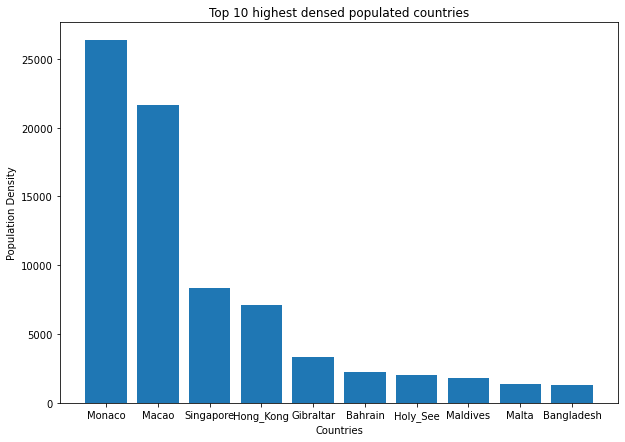

In [231]:
from matplotlib import pyplot as plt
Populaton_density = Density_top_ten['density_(p/km²)'].head(12)
Country_or_Dependency = Density_top_ten['country_(or_dependency)'].head(12)
fig = plt.figure(figsize =(10, 7))
plt.bar(Country_or_Dependency[0:10], Populaton_density[0:10])
plt.title("Top 10 highest densed populated countries")
plt.xlabel("Countries")
plt.ylabel("Population Density")
plt.show()

This bar graph give us the top ten countries based on the density of people/ Square KM.

In [163]:
Density_bottom_ten =population.nsmallest(n=10, columns=['density_(p/km²)'])
Density_bottom_ten

,#,country_(or_dependency),population_(2020),yearly_change,net_change,density_(p/km²),land_area_(km²),migrants_(net),fert_rate,med_age,urban_pop_percent,world_share
60,61,Greenland,56770,0.17_Percent,98,0,410450,NaN,,N.A.,87_Percent,0.00
113,114,Falkland_Islands,3480,3.05_Percent,103,0,12170,NaN,,N.A.,66_Percent,0.00
234,235,India,0,-100.00_Percent,-1366417754,0,2973190,-532687.0,2.2,28,N.A.,0.00
52,53,Western_Sahara,597339,2.55_Percent,14876,2,266000,5582.0,2.4,28,87_Percent,0.01
123,124,Mongolia,3278290,1.65_Percent,53123,2,1553560,-852.0,2.9,28,67_Percent,0.04
115,116,Iceland,341243,0.65_Percent,2212,3,100250,380.0,1.8,37,94_Percent,0.00
149,150,Australia,25499884,1.18_Percent,296686,3,7682300,158246.0,1.8,38,86_Percent,0.33
150,151,Namibia,2540905,1.86_Percent,46375,3,823290,-4806.0,3.4,22,55_Percent,0.03
26,27,Guyana,786552,0.48_Percent,3786,4,196850,-6000.0,2.5,27,27_Percent,0.01
35,36,Libya,6871292,1.38_Percent,93840,4,1759540,-1999.0,2.3,29,78_Percent,0.09


The above table gives us the top ten countries based on lowest density of population.

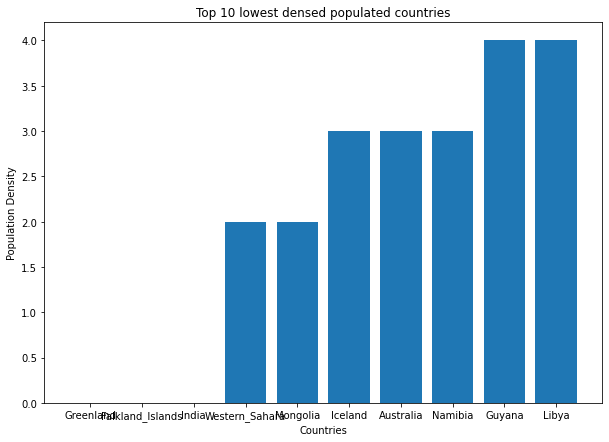

In [230]:
Populaton_density = Density_bottom_ten['density_(p/km²)'].head(12)
Country_or_Dependency = Density_bottom_ten['country_(or_dependency)'].head(12)
fig = plt.figure(figsize =(10, 7))
plt.bar(Country_or_Dependency[0:10], Populaton_density[0:10])
plt.title("Top 10 lowest densed populated countries")
plt.xlabel("Countries")
plt.ylabel("Population Density")
plt.show()

The above bar graph plot tell us the countries with the lowest density of population per sq kilometer. The Countries names are on th X Axis and the Density is given on the Y Axis.

In [165]:
Land_area=population.nlargest(n=5, columns=['land_area_(km²)'])
Land_area

,#,country_(or_dependency),population_(2020),yearly_change,net_change,density_(p/km²),land_area_(km²),migrants_(net),fert_rate,med_age,urban_pop_percent,world_share
193,194,Russia,145934462,0.04_Percent,62206,9,16376870,182456.0,1.8,40,74_Percent,0.87
194,195,China,1439323776,0.39_Percent,5540090,153,9388211,-348399.0,1.7,38,61_Percent,8.47
119,120,United_States,331002651,0.59_Percent,1937734,36,9147420,954806.0,1.8,38,83_Percent,0.25
108,109,Canada,37742154,0.89_Percent,331107,4,9093510,242032.0,1.5,41,81_Percent,0.48
160,161,Brazil,212559417,0.72_Percent,1509890,25,8358140,21200.0,1.7,33,88_Percent,0.73


The above table gives us the data of top five countries based on the land area.

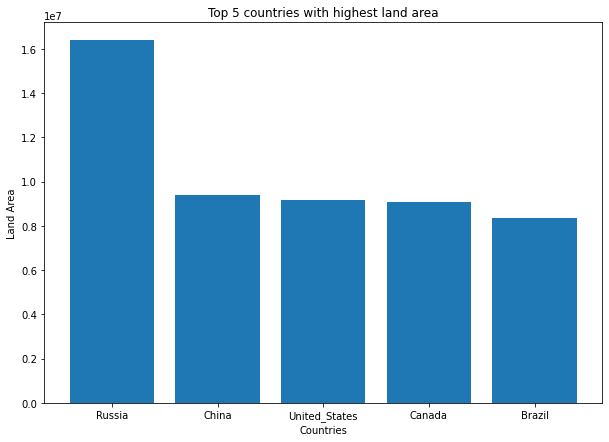

In [229]:
Land = Land_area['land_area_(km²)'].head(12)
Country_or_Dependency = Land_area['country_(or_dependency)'].head(12)
fig = plt.figure(figsize =(10, 7))
plt.bar(Country_or_Dependency[0:10], Land[0:20])
plt.title("Top 5 countries with highest land area")
plt.xlabel("Countries")
plt.ylabel("Land Area")
plt.show()

This bar graph is plotted according to the amount of land are that a country has and the comparision.
On the X axis we have the names of the countries and on the Y axis we hace the amount of land area.

In [168]:
S_land_area=population.nsmallest(n=5, columns=['land_area_(km²)'])
S_land_area

,#,country_(or_dependency),population_(2020),yearly_change,net_change,density_(p/km²),land_area_(km²),migrants_(net),fert_rate,med_age,urban_pop_percent,world_share
24,25,Holy_See,801,0.25_Percent,2,2003,0,NaN,,N.A.,N.A.,0.0
102,103,Monaco,39242,0.71_Percent,278,26337,1,NaN,,N.A.,N.A.,0.0
117,118,Gibraltar,33691,-0.03_Percent,-10,3369,10,NaN,,N.A.,N.A.,0.0
197,198,Tokelau,1357,1.27_Percent,17,136,10,NaN,,N.A.,0_Percent,0.0
223,224,Nauru,10824,0.63_Percent,68,541,20,NaN,,N.A.,N.A.,0.0


This list gives us the information about the top five countries with lowest land area.

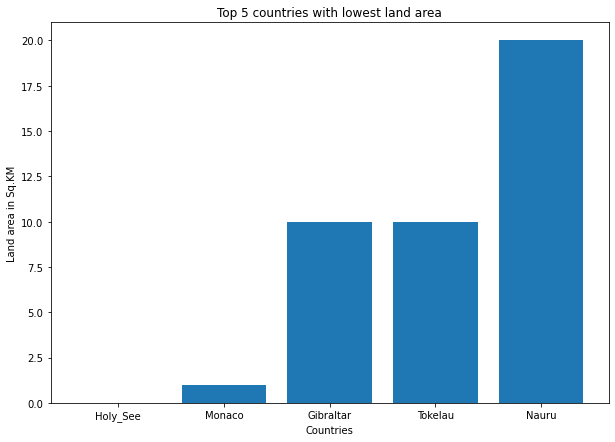

In [228]:
Land = S_land_area['land_area_(km²)'].head(12)
Country_or_Dependency = S_land_area['country_(or_dependency)'].head(12)
fig = plt.figure(figsize =(10, 7))
plt.bar(Country_or_Dependency[0:10], Land[0:20])
plt.title("Top 5 countries with lowest land area")
plt.xlabel("Countries")
plt.ylabel("Land area in Sq.KM")
plt.show()

The above bar graph shows the countries with the lowest land area where, Countries are on the X Axis and the Land area is on Y Axis. 

In [187]:
population['population_(2020)'].sort_values()

234             0
24            801
197          1357
189          1626
113          3480
          ...    
160     212559417
156     220892340
142     273523615
119     331002651
194    1439323776
Name: population_(2020), Length: 235, dtype: int64

As per the instruction, we have arranged the rows according to the ascending order of their respective population.
This gives us the countries with the lowest population to the countries with the highest population.

In [222]:
Pop_country=population.nlargest(n=10, columns=['population_(2020)'])
Pop_country

,#,country_(or_dependency),population_(2020),yearly_change,net_change,density_(p/km²),land_area_(km²),migrants_(net),fert_rate,med_age,urban_pop_percent,world_share
194,195,China,1439323776,0.39_Percent,5540090,153,9388211,-348399.0,1.7,38,61_Percent,8.47
119,120,United_States,331002651,0.59_Percent,1937734,36,9147420,954806.0,1.8,38,83_Percent,0.25
142,143,Indonesia,273523615,1.07_Percent,2898047,151,1811570,-98955.0,2.3,30,56_Percent,0.51
156,157,Pakistan,220892340,2.00_Percent,4327022,287,770880,-233379.0,3.6,23,35_Percent,0.83
160,161,Brazil,212559417,0.72_Percent,1509890,25,8358140,21200.0,1.7,33,88_Percent,0.73
164,165,Nigeria,206139589,2.58_Percent,5175990,226,910770,-60000.0,5.4,18,52_Percent,0.64
186,187,Bangladesh,164689383,1.01_Percent,1643222,1265,130170,-369501.0,2.1,28,39_Percent,0.11
193,194,Russia,145934462,0.04_Percent,62206,9,16376870,182456.0,1.8,40,74_Percent,0.87
202,203,Mexico,128932753,1.06_Percent,1357224,66,1943950,-60000.0,2.1,29,84_Percent,0.65
204,205,Japan,126476461,-0.30_Percent,-383840,347,364555,71560.0,1.4,48,92_Percent,0.62


This table gives us the top ten countries with the highest population.


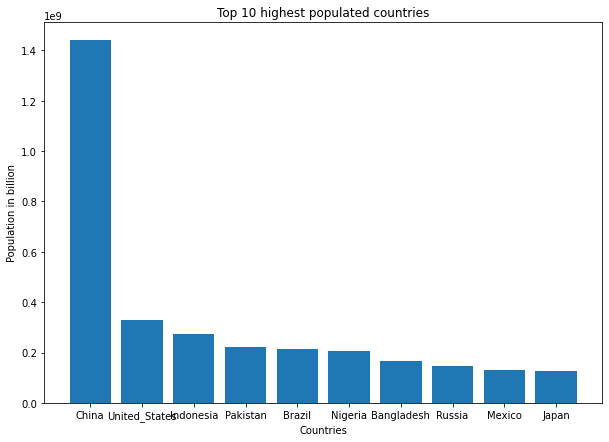

In [227]:
Population = Pop_country['population_(2020)'].head(12)
Country_or_Dependency = Pop_country['country_(or_dependency)'].head(12)
fig = plt.figure(figsize =(10, 7))
plt.bar(Country_or_Dependency[0:10], Population[0:20])
plt.title("Top 10 highest populated countries")
plt.xlabel("Countries")
plt.ylabel("Population in billion")
plt.show()

This bar graph has Countries names on the X Axis and the population on the Y Axis. China is the most populated country in the world followed by the USA and Indonesia according tho the given data.

In [221]:
Pop_small=population.nsmallest(n=10, columns=['population_(2020)'])
Pop_small

,#,country_(or_dependency),population_(2020),yearly_change,net_change,density_(p/km²),land_area_(km²),migrants_(net),fert_rate,med_age,urban_pop_percent,world_share
234,235,India,0,-100.00_Percent,-1366417754,0,2973190,-532687.0,2.2,28,,0.0
24,25,Holy_See,801,0.25_Percent,2,2003,0,NaN,,,,0.0
197,198,Tokelau,1357,1.27_Percent,17,136,10,NaN,,,0_Percent,0.0
189,190,Niue,1626,0.68_Percent,11,6,260,NaN,,,46_Percent,0.0
113,114,Falkland_Islands,3480,3.05_Percent,103,0,12170,NaN,,,66_Percent,0.0
78,79,Montserrat,4992,0.06_Percent,3,50,100,NaN,,,10_Percent,0.0
57,58,Saint_Pierre_&_Miquelon,5794,-0.48_Percent,-28,25,230,NaN,,,100_Percent,0.0
48,49,Saint_Helena,6077,0.30_Percent,18,16,390,NaN,,,27_Percent,0.0
3,4,Saint_Barthelemy,9877,0.30_Percent,30,470,21,NaN,,,0_Percent,0.0
223,224,Nauru,10824,0.63_Percent,68,541,20,NaN,,,,0.0


The above table gives us the information of the top ten countries with the lowest population.

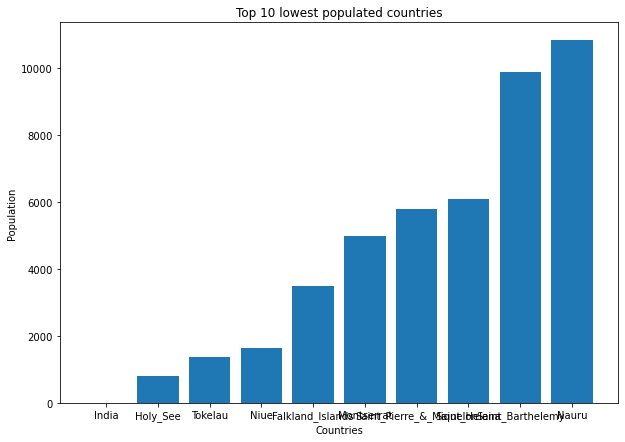

In [224]:
Population_small = Pop_small['population_(2020)'].head(12)
Country_or_Dependency = Pop_small['country_(or_dependency)'].head(12)
fig = plt.figure(figsize =(10, 7))
plt.bar(Country_or_Dependency[0:10], Population_small[0:20])
plt.title("Top 10 lowest populated countries")
plt.xlabel("Countries")
plt.ylabel("Population")
plt.show()

This graph tells us the lowest populated countries in the world. On the X Axis we have Countries name and on the Y Axis we have the Amount of population in that country.